# Assignment 10

1. Tunjukan scatter plot untuk kombinasi 2 feature ini:
  - SepalLengthCm dan PetalLengthCm
  - SepalWidthCm dan PetalWidthCm
  - SepalLengthCm dan PetalWidthCm

2. Untuk dataset **customer**
  - Cari nilai k yang paling optimal menggunakan Elbow method
  - Buat scatter plot untuk kombinasi 2 feature ini:
    - Age dan Annual Income
    - Annual Income dan Spending Score
    - Age dan Spending Score

# No. 1

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
filename_a = '/content/drive/My Drive/Datasets/iris.csv'

dataset_a = pd.read_csv(filename_a)

dataset_a.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
dataset_a = dataset_a.drop(['Id', 'Species'], axis=1)

dataset_a.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(dataset_a)
  wcss.append(kmeans.inertia_)

print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803]


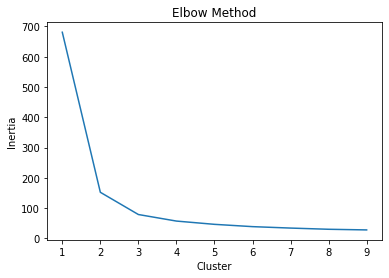

In [85]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

In [86]:
model = KMeans(n_clusters=3, random_state=10)
model.fit(dataset_a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [87]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [88]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [89]:
y_kmeans = kmeans.predict(dataset_a)

# Jawaban No. 1

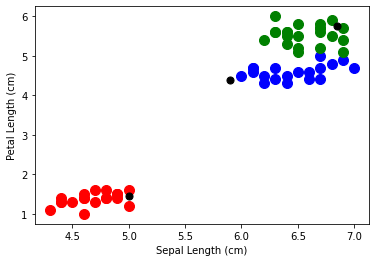

In [92]:
# Scatter plot SepalLengthCm dan PetalLenghtCm
plt.scatter(dataset_a.values[y_kmeans == 0, 0], dataset_a.values[y_kmeans == 0, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset_a.values[y_kmeans == 1, 0], dataset_a.values[y_kmeans == 1, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset_a.values[y_kmeans == 2, 0], dataset_a.values[y_kmeans == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=50, c='black', label = 'Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

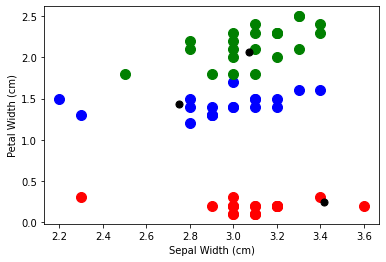

In [93]:
# Scatter plot SepalWidthCm dan PetalWidthCm
plt.scatter(dataset_a.values[y_kmeans == 0, 1], dataset_a.values[y_kmeans == 0, 3], s=100, c='red', label = 'Claster 1')
plt.scatter(dataset_a.values[y_kmeans == 1, 1], dataset_a.values[y_kmeans == 1, 3], s=100, c='blue', label = 'Claster 2')
plt.scatter(dataset_a.values[y_kmeans == 2, 1], dataset_a.values[y_kmeans == 2, 3], s=100, c='green', label = 'Claster 3')
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 3], s=50, c='black', label = 'Centroids')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

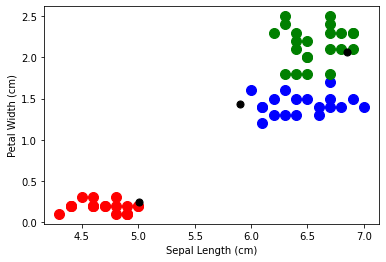

In [94]:
# Scatter plot SepalLengthCm dan PetalWidthCm
plt.scatter(dataset_a.values[y_kmeans == 0, 0], dataset_a.values[y_kmeans == 0, 3], s=100, c='red', label = 'Claster 1')
plt.scatter(dataset_a.values[y_kmeans == 1, 0], dataset_a.values[y_kmeans == 1, 3], s=100, c='blue', label = 'Claster 2')
plt.scatter(dataset_a.values[y_kmeans == 2, 0], dataset_a.values[y_kmeans == 2, 3], s=100, c='green', label = 'Claster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 3], s=50, c='black', label = 'Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# No. 2

In [95]:
filename_b = '/content/drive/My Drive/Datasets/customer.csv'

dataset_b = pd.read_csv(filename_b)

dataset_b.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
# menghapus dataset yang tidak diperlukan
dataset_b = dataset_b.drop(['CustomerID', 'Genre'], axis=1)

dataset_b.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [97]:
from sklearn.cluster import KMeans

# mencari nilai inertia dari setiap cluster
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(dataset_b)
  wcss.append(kmeans.inertia_)

print(wcss)

[308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51116.986944634315, 45311.17012435781, 41270.137865897545, 37051.184000559384, 34174.55217264217, 31986.521003811, 29657.799523624522, 27709.966304773658, 26253.569992648252, 24669.22394887721, 23169.962585240846, 21964.336034798536, 20757.475908997934]


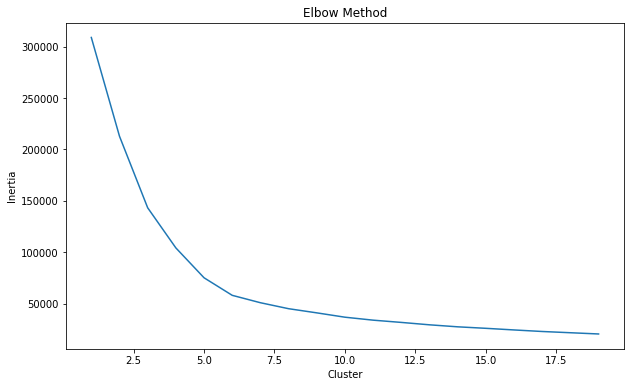

In [98]:
# menentukan metode elbow untu mencari nilai k
plt.figure(figsize=(10, 6))
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

In [99]:
# melatih model
model = KMeans(n_clusters=6, random_state=10, algorithm='full')
model.fit(dataset_b)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [100]:
# label-label pada model
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [101]:
# mentukan titik pusat dari masing-masing cluster
model.cluster_centers_

array([[27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [41.68571429, 88.22857143, 17.28571429],
       [44.14285714, 25.14285714, 19.52380952],
       [25.27272727, 25.72727273, 79.36363636],
       [56.15555556, 53.37777778, 49.08888889]])

In [102]:
# prediksi
y_kmeans = kmeans.predict(dataset_b)

# Jawaban No. 2

- Berdasarkan grafik Elbow Method diatas (No. 2) bahwa nilai **k** yang optimal adalah **6** karena pada titik tersebutlah pertemuan antara grafik curam dan landai.
- Berikut scatter plot kombinasi antra dua fitur pada soal no.2:

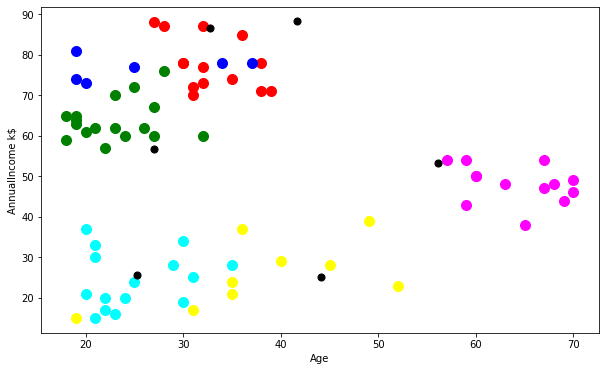

In [103]:
# Scatter plot Age and Annual Income
plt.figure(figsize=(10, 6))
plt.scatter(dataset_b.values[y_kmeans == 0, 0], dataset_b.values[y_kmeans == 0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset_b.values[y_kmeans == 1, 0], dataset_b.values[y_kmeans == 1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset_b.values[y_kmeans == 2, 0], dataset_b.values[y_kmeans == 2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset_b.values[y_kmeans == 3, 0], dataset_b.values[y_kmeans == 3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(dataset_b.values[y_kmeans == 4, 0], dataset_b.values[y_kmeans == 4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(dataset_b.values[y_kmeans == 5, 0], dataset_b.values[y_kmeans == 5, 1], s=100, c='yellow', label ='Cluster 6')
plt.xlabel('Age')
plt.ylabel('AnnualIncome k$')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='black', label = 'Centroids')
plt.show()

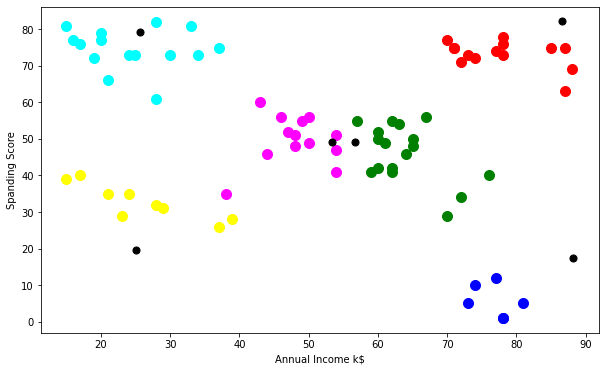

In [104]:
# Scatter plot Annual Income dan Spanding Score
plt.figure(figsize=(10, 6))
plt.scatter(dataset_b.values[y_kmeans == 0, 1], dataset_b.values[y_kmeans == 0, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset_b.values[y_kmeans == 1, 1], dataset_b.values[y_kmeans == 1, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset_b.values[y_kmeans == 2, 1], dataset_b.values[y_kmeans == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset_b.values[y_kmeans == 3, 1], dataset_b.values[y_kmeans == 3, 2], s=100, c='cyan', label ='Cluster 4')
plt.scatter(dataset_b.values[y_kmeans == 4, 1], dataset_b.values[y_kmeans == 4, 2], s=100, c='magenta', label ='Cluster 5')
plt.scatter(dataset_b.values[y_kmeans == 5, 1], dataset_b.values[y_kmeans == 5, 2], s=100, c='yellow', label ='Cluster 6')
plt.xlabel('Annual Income k$')
plt.ylabel('Spanding Score')
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], s=50, c='black', label = 'Centroids')
plt.show()

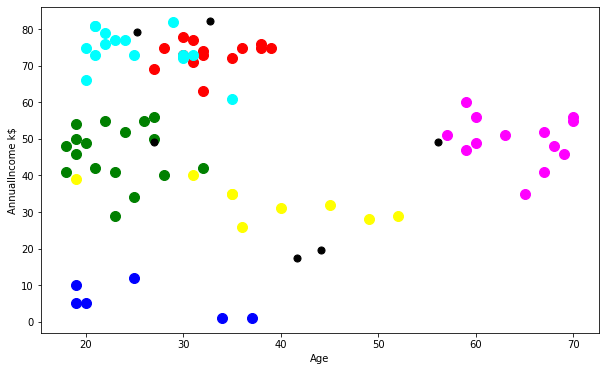

In [105]:
# Scatter plot Age and Spanding Score
plt.figure(figsize=(10, 6))
plt.scatter(dataset_b.values[y_kmeans == 0, 0], dataset_b.values[y_kmeans == 0, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset_b.values[y_kmeans == 1, 0], dataset_b.values[y_kmeans == 1, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset_b.values[y_kmeans == 2, 0], dataset_b.values[y_kmeans == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset_b.values[y_kmeans == 3, 0], dataset_b.values[y_kmeans == 3, 2], s=100, c='cyan', label ='Cluster 4')
plt.scatter(dataset_b.values[y_kmeans == 4, 0], dataset_b.values[y_kmeans == 4, 2], s=100, c='magenta', label ='Cluster 5')
plt.scatter(dataset_b.values[y_kmeans == 5, 0], dataset_b.values[y_kmeans == 5, 2], s=100, c='yellow', label ='Cluster 6')
plt.xlabel('Age')
plt.ylabel('AnnualIncome k$')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=50, c='black', label = 'Centroids')
plt.show()